In [2]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import Dense, Input, Flatten
from keras.layers import Reshape, Dropout, Concatenate
from keras.layers import Conv2D, MaxPool2D, Embedding
from keras.models import Model
import os
import json
from json2html import *
from IPython.core.display import display, HTML
from tqdm import tqdm_notebook
%matplotlib inline


Using TensorFlow backend.


In [3]:
dir = 'D:\Course Slides\Semester 3\Deep Learning for Speech\Project\ER'

In [4]:
print(os.getcwd())

D:\ML Projects\DeepLearning_Coding_Task\EmotionDetection


In [5]:
f = open(os.path.join(dir, 'train.json'), encoding="utf8")
data = json.load(f)

In [6]:
df = pd.DataFrame(data)
#df= df.T
df.head()

In [192]:
TOTAL_DATA=df.shape[0]

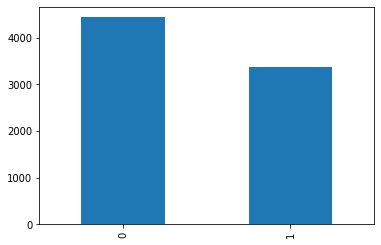

In [8]:
#fig, ax = plt.subplots()
#df['valence'].value_counts().plot(ax=ax, kind='bar')

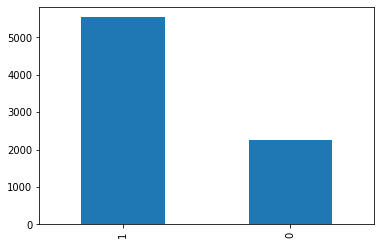

In [9]:
#fig, ax = plt.subplots()
#df['activation'].value_counts().plot(ax=ax, kind='bar')

In [170]:
for i in df['features']:
    print(np.array(i).shape)


(147, 26)
(331, 26)
(592, 26)
(145, 26)
(141, 26)
(135, 26)
(216, 26)
(165, 26)
(167, 26)
(350, 26)
(199, 26)
(558, 26)
(121, 26)
(203, 26)
(255, 26)
(550, 26)
(81, 26)
(367, 26)
(103, 26)
(533, 26)
(301, 26)
(263, 26)
(143, 26)
(1157, 26)
(130, 26)
(170, 26)
(103, 26)
(92, 26)
(129, 26)
(269, 26)
(59, 26)
(148, 26)
(319, 26)
(309, 26)
(210, 26)
(133, 26)
(648, 26)
(114, 26)
(315, 26)
(369, 26)
(60, 26)
(66, 26)
(138, 26)
(181, 26)
(114, 26)
(754, 26)
(564, 26)
(92, 26)
(267, 26)
(114, 26)
(145, 26)
(443, 26)
(557, 26)
(62, 26)
(334, 26)
(457, 26)
(129, 26)
(134, 26)
(106, 26)
(259, 26)
(173, 26)
(108, 26)
(137, 26)
(70, 26)
(95, 26)
(106, 26)
(142, 26)
(172, 26)
(329, 26)
(88, 26)
(214, 26)
(363, 26)
(135, 26)
(113, 26)
(177, 26)
(522, 26)
(170, 26)
(48, 26)
(181, 26)
(67, 26)
(93, 26)
(495, 26)
(168, 26)
(165, 26)
(133, 26)
(214, 26)
(44, 26)
(359, 26)
(163, 26)
(204, 26)
(61, 26)
(161, 26)
(119, 26)
(316, 26)
(594, 26)
(182, 26)
(446, 26)
(280, 26)
(122, 26)
(315, 26)
(333, 26)
(188

(167, 26)
(114, 26)
(135, 26)
(140, 26)
(138, 26)
(497, 26)
(122, 26)
(147, 26)
(146, 26)
(701, 26)
(94, 26)
(70, 26)
(134, 26)
(186, 26)
(140, 26)
(252, 26)
(172, 26)
(610, 26)
(177, 26)
(150, 26)
(261, 26)
(495, 26)
(128, 26)
(199, 26)
(400, 26)
(425, 26)
(77, 26)
(131, 26)
(213, 26)
(465, 26)
(150, 26)
(158, 26)
(348, 26)
(66, 26)
(118, 26)
(61, 26)
(535, 26)
(70, 26)
(170, 26)
(257, 26)
(90, 26)
(187, 26)
(114, 26)
(150, 26)
(135, 26)
(429, 26)
(273, 26)
(89, 26)
(255, 26)
(293, 26)
(344, 26)
(102, 26)
(217, 26)
(384, 26)
(327, 26)
(162, 26)
(127, 26)
(100, 26)
(61, 26)
(160, 26)
(107, 26)
(313, 26)
(117, 26)
(286, 26)
(123, 26)
(225, 26)
(137, 26)
(167, 26)
(303, 26)
(252, 26)
(134, 26)
(158, 26)
(247, 26)
(242, 26)
(103, 26)
(256, 26)
(536, 26)
(174, 26)
(119, 26)
(100, 26)
(114, 26)
(147, 26)
(209, 26)
(380, 26)
(222, 26)
(866, 26)
(159, 26)
(348, 26)
(800, 26)
(95, 26)
(224, 26)
(525, 26)
(106, 26)
(118, 26)
(187, 26)
(96, 26)
(65, 26)
(101, 26)
(416, 26)
(378, 26)
(57, 26)
(11

(124, 26)
(93, 26)
(101, 26)
(186, 26)
(160, 26)
(172, 26)
(93, 26)
(139, 26)
(210, 26)
(98, 26)
(62, 26)
(556, 26)
(76, 26)
(146, 26)
(81, 26)
(169, 26)
(289, 26)
(88, 26)
(249, 26)
(124, 26)
(157, 26)
(710, 26)
(261, 26)
(153, 26)
(596, 26)
(403, 26)
(115, 26)
(135, 26)
(98, 26)
(218, 26)
(151, 26)
(144, 26)
(467, 26)
(320, 26)
(483, 26)
(70, 26)
(230, 26)
(316, 26)
(74, 26)
(116, 26)
(102, 26)
(158, 26)
(196, 26)
(508, 26)
(212, 26)
(167, 26)
(101, 26)
(120, 26)
(301, 26)
(272, 26)
(198, 26)
(117, 26)
(119, 26)
(125, 26)
(124, 26)
(120, 26)
(229, 26)
(95, 26)
(332, 26)
(149, 26)
(110, 26)
(130, 26)
(168, 26)
(434, 26)
(105, 26)
(258, 26)
(169, 26)
(500, 26)
(110, 26)
(580, 26)
(92, 26)
(221, 26)
(154, 26)
(227, 26)
(429, 26)
(277, 26)
(273, 26)
(491, 26)
(148, 26)
(196, 26)
(63, 26)
(102, 26)
(123, 26)
(58, 26)
(337, 26)
(178, 26)
(200, 26)
(604, 26)
(198, 26)
(261, 26)
(127, 26)
(335, 26)
(76, 26)
(230, 26)
(223, 26)
(217, 26)
(302, 26)
(129, 26)
(86, 26)
(65, 26)
(260, 26)
(173, 2

(189, 26)
(226, 26)
(210, 26)
(74, 26)
(265, 26)
(254, 26)
(68, 26)
(217, 26)
(336, 26)
(348, 26)
(606, 26)
(97, 26)
(629, 26)
(567, 26)
(158, 26)
(83, 26)
(181, 26)
(106, 26)
(420, 26)
(109, 26)
(98, 26)
(312, 26)
(315, 26)
(365, 26)
(80, 26)
(258, 26)
(525, 26)
(131, 26)
(116, 26)
(211, 26)
(462, 26)
(238, 26)
(435, 26)
(381, 26)
(219, 26)
(145, 26)
(127, 26)
(137, 26)
(501, 26)
(581, 26)
(196, 26)
(387, 26)
(252, 26)
(153, 26)
(306, 26)
(61, 26)
(74, 26)
(160, 26)
(292, 26)
(157, 26)
(191, 26)
(140, 26)
(267, 26)
(142, 26)
(134, 26)
(145, 26)
(402, 26)
(229, 26)
(299, 26)
(373, 26)
(219, 26)
(121, 26)
(134, 26)
(332, 26)
(63, 26)
(214, 26)
(197, 26)
(134, 26)
(163, 26)
(51, 26)
(188, 26)
(69, 26)
(86, 26)
(553, 26)
(113, 26)
(402, 26)
(500, 26)
(207, 26)
(104, 26)
(379, 26)
(374, 26)
(195, 26)
(107, 26)
(169, 26)
(116, 26)
(95, 26)
(83, 26)
(226, 26)
(537, 26)
(190, 26)
(112, 26)
(161, 26)
(139, 26)
(208, 26)
(71, 26)
(197, 26)
(274, 26)
(112, 26)
(180, 26)
(479, 26)
(276, 26)
(315,

(296, 26)
(248, 26)
(456, 26)
(105, 26)
(373, 26)
(143, 26)
(133, 26)
(365, 26)
(115, 26)
(218, 26)
(483, 26)
(141, 26)
(262, 26)
(332, 26)
(82, 26)
(159, 26)
(363, 26)
(133, 26)
(217, 26)
(440, 26)
(155, 26)
(124, 26)
(248, 26)
(215, 26)
(122, 26)
(142, 26)
(263, 26)
(786, 26)
(193, 26)
(385, 26)
(72, 26)
(140, 26)
(155, 26)
(211, 26)
(182, 26)
(200, 26)
(225, 26)
(432, 26)
(487, 26)
(142, 26)
(163, 26)
(200, 26)
(102, 26)
(387, 26)
(143, 26)
(759, 26)
(352, 26)
(275, 26)
(158, 26)
(145, 26)
(147, 26)
(123, 26)
(165, 26)
(379, 26)
(157, 26)
(80, 26)
(179, 26)
(272, 26)
(140, 26)
(333, 26)
(154, 26)
(104, 26)
(247, 26)
(639, 26)
(241, 26)
(73, 26)
(96, 26)
(166, 26)
(184, 26)
(283, 26)
(157, 26)
(112, 26)
(208, 26)
(211, 26)
(169, 26)
(595, 26)
(184, 26)
(80, 26)
(159, 26)
(607, 26)
(353, 26)
(473, 26)
(270, 26)
(176, 26)
(52, 26)
(124, 26)
(580, 26)
(98, 26)
(190, 26)
(370, 26)
(196, 26)
(91, 26)
(161, 26)
(277, 26)
(211, 26)
(195, 26)
(64, 26)
(220, 26)
(201, 26)
(273, 26)
(55, 26)
(

(130, 26)
(92, 26)
(114, 26)
(251, 26)
(264, 26)
(272, 26)
(83, 26)
(524, 26)
(287, 26)
(116, 26)
(220, 26)
(117, 26)
(253, 26)
(410, 26)
(360, 26)
(177, 26)
(754, 26)
(95, 26)
(106, 26)
(172, 26)
(129, 26)
(255, 26)
(293, 26)
(143, 26)
(324, 26)
(242, 26)
(116, 26)
(296, 26)
(238, 26)
(122, 26)
(350, 26)
(200, 26)
(343, 26)
(258, 26)
(150, 26)
(103, 26)
(101, 26)
(112, 26)
(805, 26)
(333, 26)
(754, 26)
(740, 26)
(97, 26)
(355, 26)
(155, 26)
(444, 26)
(404, 26)
(114, 26)
(142, 26)
(361, 26)
(84, 26)
(312, 26)
(47, 26)
(420, 26)
(91, 26)
(159, 26)
(111, 26)
(426, 26)
(78, 26)
(387, 26)
(146, 26)
(106, 26)
(220, 26)
(58, 26)
(113, 26)
(174, 26)
(946, 26)
(373, 26)
(192, 26)
(183, 26)
(303, 26)
(81, 26)
(344, 26)
(261, 26)
(122, 26)
(370, 26)
(82, 26)
(86, 26)
(346, 26)
(128, 26)
(390, 26)
(110, 26)
(205, 26)
(138, 26)
(90, 26)
(84, 26)
(105, 26)
(138, 26)
(110, 26)
(650, 26)
(311, 26)
(95, 26)
(83, 26)
(261, 26)
(191, 26)
(215, 26)
(92, 26)
(69, 26)
(201, 26)
(280, 26)
(55, 26)
(78, 26)


(114, 26)
(79, 26)
(87, 26)
(254, 26)
(123, 26)
(109, 26)
(300, 26)
(168, 26)
(372, 26)
(402, 26)
(186, 26)
(261, 26)
(141, 26)
(141, 26)
(88, 26)
(138, 26)
(178, 26)
(195, 26)
(180, 26)
(56, 26)
(185, 26)
(454, 26)
(86, 26)
(151, 26)
(102, 26)
(171, 26)
(57, 26)
(356, 26)
(131, 26)
(390, 26)
(133, 26)
(108, 26)
(703, 26)
(62, 26)
(333, 26)
(336, 26)
(130, 26)
(88, 26)
(130, 26)
(115, 26)
(69, 26)
(215, 26)
(143, 26)
(89, 26)
(139, 26)
(181, 26)
(138, 26)
(347, 26)
(130, 26)
(64, 26)
(244, 26)
(106, 26)
(94, 26)
(165, 26)
(397, 26)
(314, 26)
(468, 26)
(459, 26)
(367, 26)
(203, 26)
(150, 26)
(344, 26)
(749, 26)
(65, 26)
(485, 26)
(142, 26)
(84, 26)
(303, 26)
(477, 26)
(94, 26)
(289, 26)
(222, 26)
(153, 26)
(117, 26)
(105, 26)
(469, 26)
(137, 26)
(785, 26)
(219, 26)
(90, 26)
(108, 26)
(186, 26)
(110, 26)
(61, 26)
(175, 26)
(122, 26)
(159, 26)
(713, 26)
(112, 26)
(501, 26)
(188, 26)
(158, 26)
(284, 26)
(140, 26)
(100, 26)
(686, 26)
(307, 26)
(215, 26)
(114, 26)
(74, 26)
(724, 26)
(125, 26

(114, 26)
(154, 26)
(275, 26)
(115, 26)
(248, 26)
(487, 26)
(304, 26)
(65, 26)
(262, 26)
(84, 26)
(170, 26)
(106, 26)
(324, 26)
(144, 26)
(143, 26)
(168, 26)
(87, 26)
(139, 26)
(82, 26)
(370, 26)
(765, 26)
(190, 26)
(327, 26)
(163, 26)
(160, 26)
(386, 26)
(269, 26)
(417, 26)
(229, 26)
(184, 26)
(162, 26)
(269, 26)
(436, 26)
(302, 26)
(172, 26)
(201, 26)
(118, 26)
(138, 26)
(63, 26)
(296, 26)
(269, 26)
(257, 26)
(119, 26)
(71, 26)
(144, 26)
(80, 26)
(57, 26)
(450, 26)
(129, 26)
(152, 26)
(84, 26)
(178, 26)
(456, 26)
(176, 26)
(316, 26)
(191, 26)
(300, 26)
(100, 26)
(293, 26)
(328, 26)
(468, 26)
(121, 26)
(56, 26)
(174, 26)
(342, 26)
(127, 26)
(342, 26)
(271, 26)
(326, 26)
(75, 26)
(137, 26)
(167, 26)
(137, 26)
(187, 26)
(491, 26)
(342, 26)
(213, 26)
(203, 26)
(141, 26)
(126, 26)
(137, 26)
(468, 26)
(90, 26)
(319, 26)
(166, 26)
(398, 26)
(81, 26)
(108, 26)
(134, 26)
(264, 26)
(294, 26)
(234, 26)
(348, 26)
(131, 26)
(252, 26)
(398, 26)
(221, 26)
(260, 26)
(183, 26)
(335, 26)
(345, 26)
(25

(330, 26)
(204, 26)
(106, 26)
(206, 26)
(99, 26)
(186, 26)
(966, 26)
(114, 26)
(393, 26)
(442, 26)
(78, 26)
(341, 26)
(104, 26)
(175, 26)
(358, 26)
(92, 26)
(214, 26)
(113, 26)
(96, 26)
(207, 26)
(478, 26)
(310, 26)
(177, 26)
(171, 26)
(373, 26)
(191, 26)
(146, 26)
(122, 26)
(134, 26)
(88, 26)
(312, 26)
(163, 26)
(120, 26)
(229, 26)
(185, 26)
(133, 26)
(166, 26)
(70, 26)
(75, 26)
(614, 26)
(348, 26)
(64, 26)
(192, 26)
(68, 26)
(88, 26)
(76, 26)
(90, 26)
(151, 26)
(195, 26)
(151, 26)
(185, 26)
(98, 26)
(114, 26)
(102, 26)
(567, 26)
(482, 26)
(236, 26)
(401, 26)
(68, 26)
(447, 26)
(666, 26)
(397, 26)
(232, 26)
(86, 26)
(69, 26)
(82, 26)
(333, 26)
(105, 26)
(149, 26)
(106, 26)
(408, 26)
(99, 26)
(373, 26)
(667, 26)
(373, 26)
(292, 26)
(128, 26)
(73, 26)
(134, 26)


In [33]:
shapeList=np.array([])
shapeList=[np.append(shapeList,np.array(i).shape[0]) for i in df['features']]

In [228]:
PAD_ROWS=1800 #int(np.max(shapeList))26
PAD_COLS=26

In [46]:
x = pd.DataFrame(df['features'].values.tolist())

In [62]:
zero = np.zeros((26,),dtype=float).tolist()
x.replace(to_replace=[None], value=0, inplace=True)

In [333]:
df_new = df.copy()

In [335]:
z = np.zeros((PAD_ROWS,PAD_COLS),dtype=float)
feature_set=pd.DataFrame(np.zeros((TOTAL_DATA,2),dtype=float),columns=['features','label'])
feature_set['features']=df_new['features']
code=0
for i in tqdm_notebook(range(TOTAL_DATA)):
    feat=z
    [r,c]=np.array(df_new['features'][i]).shape
    feat[:r,:c]=np.array(df['features'][i])
    feat = feat.flatten()
    feature_set.features.loc[i]=feat
    v=df_new['valence'][i]
    a=df_new['activation'][i]
    
    if v==0 and a==0:
        code=0
    elif v==0 and a==1:
        code=1
    elif v==1 and a==0:
        code=2
    elif v==1 and a==1:
        code=3
    feature_set['label'][i]=code
    

    

c:\python37\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


c:\python37\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [317]:
for i in range(TOTAL_DATA):
    
        

c:\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [340]:
lbl['label'] = pd.get_dummies(feature_set['label']).values.tolist()

In [339]:
lbl=feature_set

In [341]:
lbl

,features,label
0,"[5.502810676891276, 5.389630715979907, 5.89079...","[0, 1, 0, 0]"
1,"[5.059076172970736, 5.288492317702101, 4.26334...","[0, 0, 0, 1]"
2,"[4.218546271669202, 4.961436495859291, 3.66501...","[0, 1, 0, 0]"
3,"[4.650364321573866, 4.523905028353254, 5.01684...","[0, 0, 1, 0]"
4,"[3.900221957277269, 2.7325726489808124, 2.5658...","[0, 1, 0, 0]"
...,...,...
7795,"[5.831977880602283, 7.114089905559089, 8.55469...","[0, 1, 0, 0]"
7796,"[0.5258330439623891, 2.9272643183639397, 3.841...","[0, 0, 0, 1]"
7797,"[4.143303134724048, 3.7911807963903073, 4.7099...","[0, 1, 0, 0]"
7798,"[5.172589067838509, 3.7146765808185527, 3.8198...","[0, 1, 0, 0]"


In [336]:
# for i in range(TOTAL_DATA):
#     print(feature_set['features'][i].shape)